In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from helper_functions import evaluate, plot_roc,plot_precision_recall, plot_confusion_matrix

In [2]:
def train_model(ratio,solver,shrinkage):
    # Load training and testing data
    X_train = np.loadtxt('X_train.csv', delimiter=',', skiprows=1) # each row is an observation with 6 features
    y_train = np.loadtxt('y_train.csv', delimiter=',', skiprows=1)[:,1] # each row corresponds to actual value of observation from ^
    
    # Set up the model
    classification = LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto')
    
    # Partition data into train and test
    train_x, cross_validation_x_data, train_y, cross_validation_actual_y_values = train_test_split(X_train, y_train, test_size=(1-ratio), random_state=0)

    # Train model
    classification.fit(train_x, train_y)

    # Test model
    predicted_validation_y = classification.predict(cross_validation_x_data)
    
    # predict probabilities
    predicted_validation_y_probs = classification.predict_proba(cross_validation_x_data)
    
    return classification, predicted_validation_y, cross_validation_actual_y_values,predicted_validation_y_probs


ratio = 0.76
solver='lsqr'
shrinkage='auto'
trained_classification, predicted_validation_y, validation_actual_y_values,predicted_validation_y_probs = train_model(ratio,solver,shrinkage)

title = "Linear Discriminant Analysis"
accuracy, sensitivity,con_matrix = evaluate(predicted_validation_y, validation_actual_y_values)

X_test = np.loadtxt('X_test.csv', delimiter=',', skiprows=1)
y_pred = trained_classification.predict(X_test)

Accuracy Rate = 0.8333333333333334
Sensitivity\Recall Rate = 0.92
Precision Rate = 0.7931034482758621
F1 Score = 0.851851851851852


ROC AUC Score = 0.9356521739130435


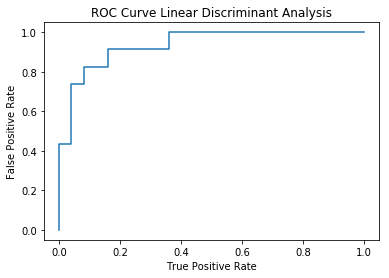

In [3]:
# different from what the lecture notes call ROC curve, 
plot_roc(validation_actual_y_values,predicted_validation_y_probs[:, 1],title)

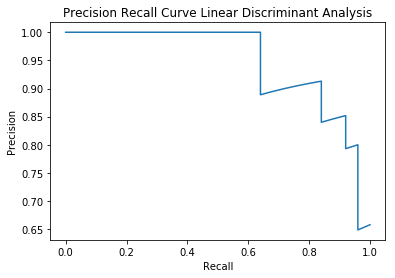

In [4]:
# what the lectures call ROC curve
plot_precision_recall(validation_actual_y_values,predicted_validation_y_probs[:, 0],title)

Confusion Matrix of Classes
[[23  2]
 [ 6 17]]
---


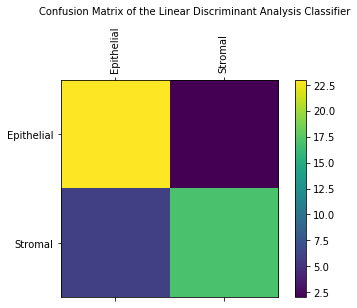

<Figure size 432x288 with 0 Axes>

In [5]:
plot_confusion_matrix(con_matrix,["Epithelial", "Stromal"],title,text_x=-0.7,text_y=-1.1)

In [6]:
test_header = "Id,EpiOrStroma"
n_points = X_test.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = range(n_points)
y_pred_pp[:, 1] = y_pred
np.savetxt('my_submission.csv', y_pred_pp, fmt='%d', delimiter=",",
           header=test_header, comments="")  